# Programmieren mit IfcOpenShell: Einführung

Wie in jedes andere Pythonmodul, muss IfcOpenshell zunächst import werden um die Funktionalitäten zur Verfügung zu haben

In [1]:
import ifcopenshell

Dann kann eines der verfügbaren Modelle geladen werden. Im  `data` stehen eine paar Testmodelle bereit.

In [5]:
m = ifcopenshell.open("./data/hello_reiff_2021.ifc")


Mit der in diesem Notebook verfügbaren Helfer-Klasssen `JupyterIFCRenderer` kann das geladene Modell eingebettet im Notebook angezeigt werden.

In [10]:
from utils.JupyterIFCRenderer import JupyterIFCRenderer
viewer = JupyterIFCRenderer(m, size=(400,300))
viewer

## Auswahl von Objekten
Durch klicken mit der Maus auf ein Objekt mit dem im Viewer-Fenster können wir ein Objekt auswählen. Rechts vom 3D-Fenster erscheinen entsprechende Informationen zur Art des Objecktes und seinen Attributen. Das momentan selektierte Objekt können wir einer Variablen zuweisen.


In [25]:
auswahl = viewer.getSelectedProduct()
auswahl

#45=IfcWallStandardCase('3vB2YO$MX4xv5uCqZZG05x',#2,'Wall xyz','Description of Wall',$,#46,#51,$)

## Attribute

Die ausgegebene Information ist genau die Zeile, mit der das entsprechende Objekt in der `.ifc` Datei (im sog. "STEP Physical File Format" nach der ISO 10303 part 21) definiert wurde.

IfcOpenshell bietet verschiedene Möglichkeiten, um Informationen des Objektes anzuzeigen. `get_info()` liefert ein dictionary aller attribute, und ihrer Werte für das entsprechenden Objekt.

In [27]:
auswahl.get_info()

{'id': 45,
 'type': 'IfcWallStandardCase',
 'GlobalId': '3vB2YO$MX4xv5uCqZZG05x',
 'OwnerHistory': #2=IfcOwnerHistory(#3,#6,$,.ADDED.,$,$,$,1217620436),
 'Name': 'Wall xyz',
 'Description': 'Description of Wall',
 'ObjectType': None,
 'ObjectPlacement': #46=IfcLocalPlacement(#36,#47),
 'Representation': #51=IfcProductDefinitionShape($,$,(#79,#83)),
 'Tag': None}

Auf jedes Attribut kann auf verschieden Arten im Skript zugegriffen werden:

Alle Attribute können in der Reihenfolge ihrer Schema-Definition geladen werden: Das 0te Element ist bei allen von `IfcRoot` Elementen immer die GlobalId, also eine üseudo-zufällig erzeugte Zeichenkette mit einem einzigartigen Identifikator. Das dritte Element (indexzummer 2) ist der `Name` (wenn der vergeben wurde).

In [30]:
auswahl[0]

'3vB2YO$MX4xv5uCqZZG05x'

In [31]:
auswahl[2]

'Wall xyz'

Wenn wir sicher sind, um welche Instanz es sich handelt, können wir auch per .Attrubutnamen - Notation direkt auf das den Wert des entsprechenen Parameters zugreifen.

In [28]:
auswahl.GlobalId

'3vB2YO$MX4xv5uCqZZG05x'

## Verbindungen und Beziehungen

![ifc-fills-voids-element-relation.png](../img/ifc-fills-voids-element-relation-graphics.png)

![ifc-fills-voids-element-relation.png](../img/ifc-fills-voids-element-relation.png)
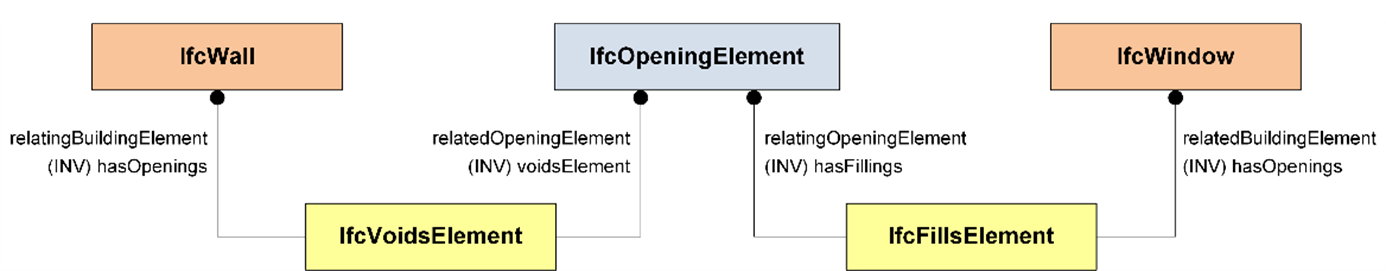

In [75]:
## Schema und Intropsektion
import ifcopenshell.util
import ifcopenshell.util.element
print(ifcopenshell.util.element.get_psets(auswahl))

{}


In [49]:
help(m.wrapped_data.entity_names())

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |      Return self<

In [57]:
import ifcopenshell
schema = ifcopenshell.ifcopenshell_wrapper.schema_by_name("IFC4")
wall_decl = schema.declaration_by_name("IfcWall")

In [67]:
dir(ifcopenshell.ifcopenshell_wrapper)

['BRep',
 'BRep_swigregister',
 'ElementSettings',
 'ElementSettings_swigregister',
 'FileDescription',
 'FileDescription_swigregister',
 'FileName',
 'FileName_swigregister',
 'FileSchema',
 'FileSchema_swigregister',
 'HeaderEntity',
 'HeaderEntity_swigregister',
 'IfcBaseEntity',
 'IfcBaseEntity_swigregister',
 'IfcBaseType',
 'IfcBaseType_swigregister',
 'IfcEntityInstanceData',
 'IfcEntityInstanceData_swigregister',
 'IfcLateBoundEntity',
 'IfcLateBoundEntity_swigregister',
 'IfcSpfHeader',
 'IfcSpfHeader_swigregister',
 'Material',
 'Material_swigregister',
 'Representation',
 'Representation_swigregister',
 'Serialization',
 'Serialization_swigregister',
 '__builtin__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__eq__',
 '__file__',
 '__loader__',
 '__lt__',
 '__name__',
 '__package__',
 '__spec__',
 '_ifcopenshell_wrapper',
 '_newclass',
 '_object',
 '_swig_getattr',
 '_swig_property',
 '_swig_repr',
 '_swig_setattr',
 '_swig_setattr_nondynamic',
 'aggregation_type',
 'aggr

Mit der Funktion `m.wrapped_data.types()` können wir uns alle im Modell verwendeten Datenypen anzeigen lassen:

In [24]:
m.wrapped_data.types()

('IfcApplication',
 'IfcDimensionalExponents',
 'IfcMaterial',
 'IfcMaterialLayer',
 'IfcMaterialLayerSet',
 'IfcMaterialLayerSetUsage',
 'IfcMeasureWithUnit',
 'IfcOrganization',
 'IfcOwnerHistory',
 'IfcPerson',
 'IfcPersonAndOrganization',
 'IfcSIUnit',
 'IfcShapeRepresentation',
 'IfcUnitAssignment',
 'IfcArbitraryClosedProfileDef',
 'IfcConversionBasedUnit',
 'IfcGeometricRepresentationContext',
 'IfcLocalPlacement',
 'IfcProductDefinitionShape',
 'IfcPropertySingleValue',
 'IfcAxis2Placement3D',
 'IfcCartesianPoint',
 'IfcDirection',
 'IfcExtrudedAreaSolid',
 'IfcProject',
 'IfcPropertySet',
 'IfcRelAssociatesMaterial',
 'IfcRelContainedInSpatialStructure',
 'IfcRelDefinesByProperties',
 'IfcRelFillsElement',
 'IfcRelVoidsElement',
 'IfcBuilding',
 'IfcBuildingStorey',
 'IfcOpeningElement',
 'IfcPolyline',
 'IfcRelAggregates',
 'IfcSite',
 'IfcDoor',
 'IfcWallStandardCase')

In [11]:
viewer.setDefaultColors()

In [19]:
viewer.getSelectedProduct()

#36497=IfcFurnishingElement('2kvhekJrnDjRw0CDkKW$UD',#33,'M_Table-Coffee:0610 x 0610 x 0610mm:0610 x 0610 x 0610mm:206283',$,'0610 x 0610 x 0610mm',#36496,#36490,'206283')

In [ ]:
viewer._bb.xmax
dir(viewer._renderer)

In [8]:
settings = ifcopenshell.geom.settings()
settings.set(settings.USE_PYTHON_OPENCASCADE, True)
for wall in m.by_type("IfcDoor"):
    pdtc_shape = ifcopenshell.geom.create_shape(settings, wall)
    print(pdtc_shape.styles[0])

In [9]:
for p in m.by_type("IfcProduct"):
    viewer.setColorProduct(p, "#BBBBBB")

In [18]:
from IPython.display import display, HTML
js = "<script>alert('Hello World!');</script>"
viewer.html.value+=js

In [ ]:
viewer.setDefaultColors()

In [ ]:
tree_settings = ifcopenshell.geom.settings()
tree_settings.set(tree_settings.DISABLE_OPENING_SUBTRACTIONS, True)
t = ifcopenshell.geom.tree(m, tree_settings)
    

In [ ]:
wall = m.by_type("IfcWall")[0]
print("Intersecting with wall 2O2Fr$t4X7Zf8NOew3FLPP")
print(t.select(wall))



In [ ]:
sel = t.select(wall)
type(sel[0])

In [ ]:
list(viewer._meshdict.values())[0].material.metallness=0.0
list(viewer._meshdict.values())[0].material.

In [ ]:
list(viewer._meshdict.values())[0].material.__dict__




In [ ]:
viewer.layout

In [115]:
help(viewer.layout)

Help on Layout in module ipywidgets.widgets.widget_layout object:

class Layout(ipywidgets.widgets.widget.Widget)
 |  Layout(*args, **kwargs)
 |  
 |  Layout specification
 |  
 |  Defines a layout that can be expressed using CSS.  Supports a subset of
 |  https://developer.mozilla.org/en-US/docs/Web/CSS/Reference
 |  
 |  When a property is also accessible via a shorthand property, we only
 |  expose the shorthand.
 |  
 |  For example:
 |  - ``flex-grow``, ``flex-shrink`` and ``flex-basis`` are bound to ``flex``.
 |  - ``flex-wrap`` and ``flex-direction`` are bound to ``flex-flow``.
 |  - ``margin-[top/bottom/left/right]`` values are bound to ``margin``, etc.
 |  
 |  Method resolution order:
 |      Layout
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  align_content
 |      An enum of st